# Welcome To The Practice Notebook 
---

Importing the pandas library

In [2]:
import pandas as pd 

Import the json Imdb Dataset

In [3]:
# Your code goes here
data = pd.read_json('movies_dataset.json')
data.head(3)

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8


Answer to the following Analytical questions: 

Question 1: Which country has gained the highest average IMdb Score according to our data? <br>
Use a bar chart to visualize your results

Average IMDB Score By Country:: country
Afghanistan             7.400000
Argentina               7.500000
Aruba                   4.800000
Australia               6.514545
Bahamas                 4.400000
                          ...   
Turkey                  6.000000
UK                      6.818304
USA                     6.367428
United Arab Emirates    8.200000
West Germany            7.266667
Name: imdb_score, Length: 65, dtype: float64
---------------------------------
Highest Avg Score is:: 8.7 by Country:: Kyrgyzstan


<Axes: xlabel='country'>

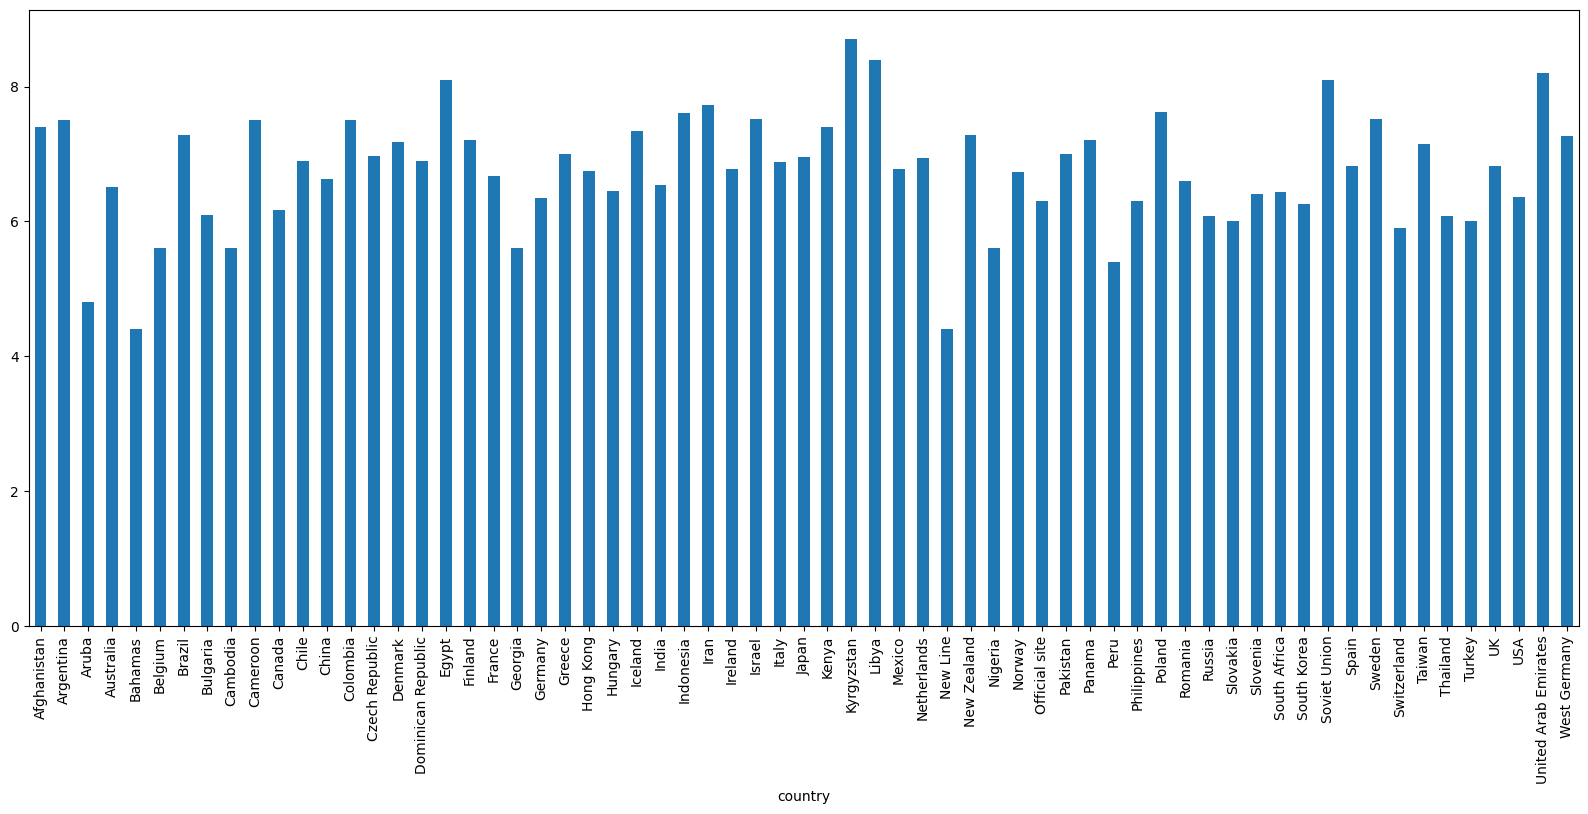

In [4]:
# Write your code here
avg_imdb_score = data.groupby('country')['imdb_score'].mean()

highest_avg_score = avg_imdb_score.max()
country_highest_score = avg_imdb_score.idxmax()

print(f'Average IMDB Score By Country:: {avg_imdb_score}')
print('---------------------------------')
print(f'Highest Avg Score is:: {highest_avg_score} by Country:: {country_highest_score}')

avg_imdb_score.plot.bar(figsize=(20,8))

Question 2: How many `colored` and `Black&White` movies do we have in our dataset?

In [5]:
# Write your code here
col = data[data.color=='Color']
bw = data[data.color=='Black and White']
print(f'Color Shape:: {col.shape[0]}')
print(f'Black & White Shape:: {bw.shape[0]}')


Color Shape:: 4815
Black & White Shape:: 209


Question 3: Which movies of `Christopher Nolan` has the highest IMdb Score? <br>
Use a barchart to visualize the results

IMDB Scores:: movie_title
Batman Begins            8.3
Inception                8.8
Insomnia                 7.2
Interstellar             8.6
Memento                  8.5
The Dark Knight          9.0
The Dark Knight Rises    8.5
The Prestige             8.5
Name: imdb_score, dtype: float64
-----------------------------------
Best Score:: 9.0 for Title:: The Dark Knight


<Axes: xlabel='movie_title'>

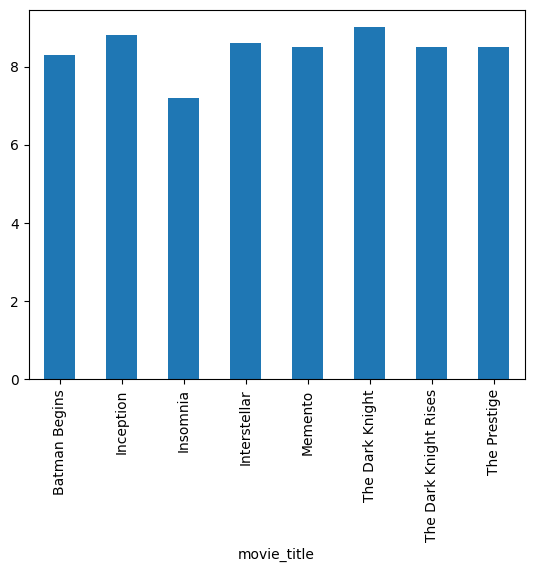

In [6]:
# Write your code here
# create a dataset with only chris nolan's movies
chris_movies = data[data['director_name']=='Christopher Nolan']
# list max scores for each movie
max_scores = chris_movies.groupby('movie_title')['imdb_score'].max()
# list best score
best_score = max_scores.max()
# title of best movie
best_title = max_scores.idxmax()

print(f'IMDB Scores:: {max_scores}')
print('-----------------------------------')
print(f'Best Score:: {best_score} for Title:: {best_title}')

max_scores.plot.bar()

Question 4: Use a line chart to visualize how many movies have been produced in `USA` from `2010` to `2015`. 

title_year
2011.0    164
2012.0    173
2013.0    171
2014.0    187
dtype: int64
(695, 14)


<Axes: xlabel='title_year'>

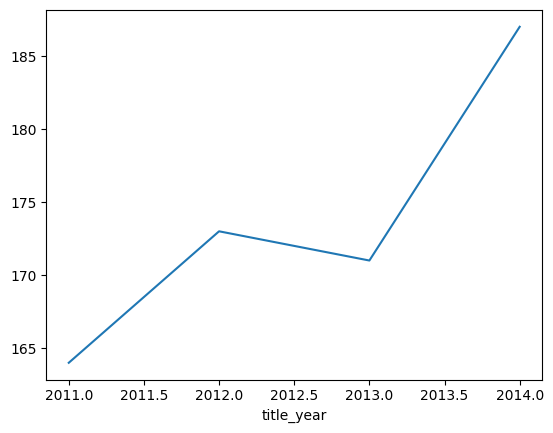

In [10]:
# Write your code here
us_movies = data[
    (data.country =='USA') & 
    (data['title_year']>2010) & 
    (data['title_year']<2015)
    ]
num_of_movies=us_movies.groupby('title_year').size()

print(num_of_movies)
print(us_movies.shape)

num_of_movies.plot()